In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
import pandas as pd

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()

imported h5py...
modules seem to have loaded?


In [2]:
plt.show();
plt.rcParams.update({'font.size':20,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18,
                     "xtick.minor.top":True, "ytick.minor.right":True,
                     "xtick.minor.visible": True,
                     "ytick.minor.visible": True})

In [3]:
# defining color palette for plotting
palette = {"low":"olive", "high":"salmon", 
           "difference":"#2C1D11", "difference2":"#464646"
          }    
        

# Load data

In [4]:
# import unique pair catalogs
low = {}
high = {}

# low-mass pairs
f = h5py.File(f"{paths.path_data}hail-mary/unique_orbits.hdf5",'r')
for key, val in f.items():
    low[key] = np.array(val)
f.close()
    
# high-mass pairs
g = h5py.File(f"{paths.path_data}big-bad/unique_orbits_massive.hdf5",'r')
for key, val in g.items():
    high[key] = np.array(val)
g.close()

# conversion between snapshot-redshift-time
h = h5py.File(f"{paths.path_data}snapshot_data.hdf5",'r')
convert = {}
for key, val in h.items():
    convert[key] = np.array(val)
h.close()


# For paper: data for 4.1

## In text example

In [6]:
low_counts[40]

array([6574, 5787])

In [7]:
convert['Redshift'][40]

1.4955121664955557

In [8]:
# calculate the above for all snapshots

# post infall means that the infall snapshot must be = or prior to 40
postinfall_at_snap = low['InfallSnapshot'] <= 40

# pre-merger means the merger snapshot must be after 40 OR be a non-merger
merge_later = low['MergeSnapshot'] > 40

postinfall_willmerge = postinfall_at_snap&merge_later # only will merge


In [11]:
seps_will_merge = np.where(postinfall_willmerge, low['Separations'][:,40], np.nan)

In [17]:
mask_150 = (seps_will_merge < 150)&(seps_will_merge > 10)
mask_50 = (seps_will_merge < 50)&(seps_will_merge > 10)

count_150 = np.count_nonzero(mask_150)
count_50 = np.count_nonzero(mask_50)
count_total = np.count_nonzero(postinfall_willmerge)

print(f"{count_150} merging pairs have seps between 10-150 kpc, which is {count_150/count_total*100:0.2f}%")
print(f"{count_50} merging pairs have seps between 10-50 kpc, which is {count_50/count_total*100:0.2f}%")

4984 merging pairs have seps between 10-150 kpc, which is 86.12%
2458 merging pairs have seps between 10-50 kpc, which is 42.47%


In [31]:
mask_50 = (seps_will_merge < 50)&(seps_will_merge > 10)

mergesnap = low['MergeSnapshot'][mask_50]
mergetimes = convert["Lookback Time"][mergesnap]
timetilmerge = convert["Lookback Time"][40] - mergetimes

count_mergein2Gyr = np.count_nonzero(timetilmerge<2)

In [30]:
len(timetilmerge)

2458

(array([1596.,  611.,  168.,   36.,   19.,    8.,    4.,    9.,    4.,
           3.]),
 array([0.20878849, 1.10488327, 2.00097805, 2.89707282, 3.7931676 ,
        4.68926238, 5.58535715, 6.48145193, 7.3775467 , 8.27364148,
        9.16973626]),
 <BarContainer object of 10 artists>)

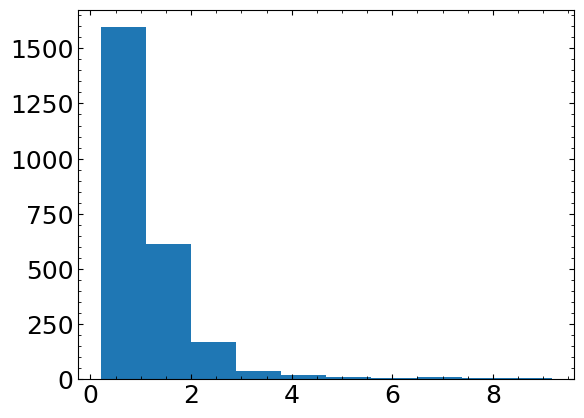

In [34]:
plt.hist(timetilmerge)


In [32]:
count_mergein2Gyr


2207

In [ ]:
mergetimes = convert["Lookback Time"][mergesnap]
timetilmerge = convert["Lookback Time"][snaps[ind]] - mergetimes

count_150 = np.count_nonzero(mask_150)
count_50 = np.count_nonzero(mask_50)
count_total = np.count_nonzero(postinfall_willmerge)

print(f"{count_150} merging pairs have seps between 10-150 kpc, which is {count_150/count_total*100:0.2f}%")
print(f"{count_50} merging pairs have seps between 10-50 kpc, which is {count_50/count_total*100:0.2f}%")

In [ ]:
# calculate the above for all snapshots

low_counts = []

for snap in convert['Snapshot']:
    # post infall means that the infall snapshot must be = or prior to 40
    postinfall_at_snap = low['InfallSnapshot'] <= snap

    # pre-merger means the merger snapshot must be after 40 OR be a non-merger
    merge_later = low['MergeSnapshot'] > snap
    non_mergers = low['MergeSnapshot'] == -1

    unmerged_at_snap = merge_later|non_mergers

    postinfall_unmerged = postinfall_at_snap&unmerged_at_snap # includes will merge & won't merge
    count = np.count_nonzero(postinfall_unmerged)
    
    postinfall_willmerge = postinfall_at_snap&merge_later # only will merge
    count_merge = np.count_nonzero(postinfall_willmerge)

    low_counts.append([count,count_merge])
    
low_counts = np.array(low_counts)